In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integral


# I. Estimating Distribution Parameters

## 1. Estimator
Let $\Phi$
1. an estimator is any function $\hat{\Phi}$ that assigns to a random variable $X$ another random variable $\hat{\Phi}(X)$
2. an estimator $\hat{\Phi}$ of $\Phi$ is said to be unbiased if $X\rightarrow \mathbb{E}\left[\Phi(X)\right]$ is a constant function equal to $\Phi$

## 2. Sample from a random variable
1. Let $X$ be a random variable with a pdf $f$ with a mean $\mu$ and standard deviation $\sigma$
2. We will randomly (how?) pick $n$ observations

Let $\boldsymbol{X}=\left(X_i\right)_{i\in\{1,\dots,n\}}$ be the vector of random observations that are idenpendant and identically distributed

$\boldsymbol{X}$ itself is a random variable

## 3. Estimating mean
Let $\hat{\mu}\left(\boldsymbol{X}\right)=\frac{1}{n}\sum_{i=1}^n X_i$ be the sample mean

$\hat{\mu}$ is an estimator of $\mu$
$$\begin{align}
\mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)\right]&=\mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n X_i\right] \\
&= \frac{1}{n} \sum_{i=1}^n \mathbb{E}\left[X_i\right] \\
&= \frac{1}{n} \sum_{i=1}^n \mu \\
&= \mu
\end{align}$$
We can conclude that the sample mean is an unbiased estimator of the mean

We will calculate the expected estimation error:
$$ \begin{align}
\mathbb{E}\left[\left(\hat{\mu}\left(\boldsymbol{X}\right)-\mu\right)^2\right] 
&= \mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right]-2\mathbb{E}\left[\hat{\mu}(\boldsymbol{X})\mu\right]+\mathbb{E}\left[\mu^2\right]
\\
&= \mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right]-2\mu\mathbb{E}\left[\hat{\mu}(\boldsymbol{X})\right]+\mu^2\\
&= \frac{1}{n^2}\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j\right]-2\mu^2+\mu^2\\
&= \frac{1}{n^2}\sum_{i=1}^n\mathbb{E}\left[X_i^2\right]+\frac{1}{n^2}\sum_{i,j=1\\ i\neq j}^n\mathbb{E}\left[X_iX_j\right]-\mu^2\\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{1}{n^2}\sum_{i,j=1\\ i\neq j}^n\mathbb{E}\left[X_i\right]\mathbb{E}\left[X_j\right]-\mu^2 \\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{1}{n^2}\sum_{i,j=1\\ i\neq j}^n\mathbb{E}\left[X\right]\mathbb{E}\left[X\right]-\mu^2 \\
&=  \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{1}{n^2}\sum_{i,j=1\\ i\neq j}^n\mathbb{E}\left[X\right]^2-\mu^2 \\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{n-1}{n}\mathbb{E}\left[X\right]^2-\mu^2 \\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{n-1}{n}\mu^2-\mu^2\\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]-\frac{1}{n}\mu^2\\
&= \frac{1}{n}\left(\mathbb{E}\left[X^2\right]-\mu^2\right)\\
&= \frac{\sigma^2}{n}
\end{align} $$
## 4. Estimating Variance
Let $\hat{\sigma^2}\left(\boldsymbol{X}\right)=\frac{1}{n}\sum_{i=1}^n \left(X_i-\hat{\mu}\left(\boldsymbol{X}\right)\right)^2$ be the sample (naive) variance
$$\begin{align}
\mathbb{E}\left[\hat{\sigma^2}\left(\boldsymbol{X}\right)\right]&=\mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n \left(X_i-\hat{\mu}\left(\boldsymbol{X}\right)\right)^2\right] \\
&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[\left(X_i-\hat{\mu}\left(\boldsymbol{X}\right)\right)^2\right] \\
&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[X_i^2-2X_i\hat{\mu}\left(\boldsymbol{X}\right)+\hat{\mu}\left(\boldsymbol{X}\right)^2\right] \\
&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[X_i^2\right]-2\mathbb{E}\left[X_i\hat{\mu}\left(\boldsymbol{X}\right)\right]+\mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right] \\
&=  \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[X_i^2\right]- \frac{2}{n}\sum_{i=1}^n \mathbb{E}\left[X_i\hat{\mu}\left(\boldsymbol{X}\right)\right]+ \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{2}{n}\sum_{i=1}^n \mathbb{E}\left[\frac{1}{n}X_i\sum_{j=1}^nX_j\right]+
 \mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{2}{n^2}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}\left[X_iX_j\right]+
 \mathbb{E}\left[\frac{1}{n^2}\left(\sum_{i=1}^n X_i\right)^2\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{2}{n^2}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}\left[X_iX_j\right]+
 \mathbb{E}\left[\frac{1}{n^2}\sum_{i=1}^n \sum_{j=1}^n X_iX_j\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{2}{n^2}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}\left[X_iX_j\right]+
\frac{1}{n^2}\sum_{i=1}^n \sum_{j=1}^n \mathbb{E}\left[X_iX_j\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{1}{n^2}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}\left[X_iX_j\right]\\
&= \mathbb{E}\left[X^2\right]- \frac{1}{n^2}\sum_{i=1}^n \mathbb{E}\left[X_i^2\right]- \frac{1}{n^2}\sum_{i,j=1 \\ i\neq j}^n \mathbb{E}\left[X_iX_j\right] \\
&= \mathbb{E}\left[X^2\right]- \frac{1}{n^2}\sum_{i=1}^n \mathbb{E}\left[X_i^2\right]- \frac{1}{n^2}\sum_{i,j=1 \\ i\neq j}^n \mathbb{E}\left[X_i\right]\mathbb{E}\left[X_j\right] \\
&= \mathbb{E}\left[X^2\right]- \frac{1}{n^2}\sum_{i=1}^n \mathbb{E}\left[X^2\right]- \frac{1}{n^2}\sum_{i,j=1 \\ i\neq j}^n \mathbb{E}\left[X\right]\mathbb{E}\left[X\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{n}{n^2} \mathbb{E}\left[X^2\right] - \frac{n(n-1)}{n^2}\mathbb{E}\left[X\right]^2\\
&= \frac{n-1}{n}\mathbb{E}\left[X^2\right]-\frac{n-1}{n}\mathbb{E}\left[X\right]^2 \\
&= \frac{n-1}{n}\left(\mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2\right) \\
&= \frac{n-1}{n}\sigma^2 \\
\implies \frac{n}{n-1}\hat{\sigma^2}(\boldsymbol{X}) &=\sigma^2
\end{align}$$
So we have for $n>1,\quad\hat{\sigma_*^2}(\boldsymbol{X})=\frac{n}{n-1}\hat{\sigma^2}(\boldsymbol{X})=\frac{1}{n-1}\sum_{i=1}^n\left(X_i-\hat{\mu}(\boldsymbol{X})\right)^2$ is an unbiased estimator of $\sigma^2$
We will call it the sample variance

## 5.Variance of Sample Variance
We will use the following identities 
$$\begin{align}
\sum_{i=1}^n\mathbb{E}\left[X_i^4\right]&=n\mu_4 \\
\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]&=n\mu_4+n(n-1)\mu_2^2 \\
\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right]&=n\mu_4+2n(n-1)\mu_3\mu_1+n(n-1)\mu_2^2+n(n-1)(n-2)\mu_1^2\mu_2 \\
\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]&=n\mu_4+4n(n-1)\mu_3\mu_1+3n(n-1)\mu_2^2+6n(n-1)(n-2)\mu_2\mu_1^2+n(n-1)(n-2)(n-3)\mu_1^4  \\
\mathbb{E}\left[\left(X-\mu\right)^4\right] &= \kappa \\
&= \mu_4-4\mu_1\mu_3-3\sigma^4+3\mu_2^2
\end{align}$$
We will note $\hat{\mu}=\hat{\mu}(\boldsymbol{X}),$We have:
$$
\begin{align}
\mathbb{E}\left[\left(\hat{\sigma_*^2}(\boldsymbol{X})-\sigma^2\right)^2\right]&= \mathbb{E}\left[\hat{\sigma_*^2}(\boldsymbol{X})^2\right]-\mathbb{E}\left[\hat{\sigma_*^2}(\boldsymbol{X})\right]^2 \\
&= \mathbb{E}\left[\left(\hat{\sigma_*^2}(\boldsymbol{X})-\sigma^2\right)^2\right] \\
&= \mathbb{E}\left[\hat{\sigma_*^2}(\boldsymbol{X})^2\right]-\sigma^4 \\
&= \frac{1}{(n-1)^2}\sum_{i,j=1}^n\mathbb{E}\left[\left(X_i-\hat{\mu}(\boldsymbol{X})\right)^2\left(X_j-\hat{\mu}(\boldsymbol{X})\right)^2\right]-\sigma^4 \\
&= \frac{1}{(n-1)^2}\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2  -  2X_i^2X_j\hat{\mu}   +   X_i^2\hat{\mu}^2   -   2X_iX_j^2\hat{\mu}  +4X_iX_j\hat{\mu}^2   - 2X_iX_j\hat{\mu}^3 + X_j^2\hat{\mu}^2 - 2X_j\hat{\mu}^3  +\hat{\mu}^4\right]-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  2\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j\hat{\mu}\right]   +   \sum_{i,j=1}^n\mathbb{E}\left[X_i^2\hat{\mu}^2\right]   -   2\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j^2\hat{\mu}\right]  +4\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j\hat{\mu}^2\right]\right)   + \\
& \frac{1}{(n-1)^2}\left(-2\sum_{i,j=1}^n\mathbb{E}\left[X_i\hat{\mu}^3\right] + \sum_{i,j=1}^n\mathbb{E}\left[X_j^2\hat{\mu}^2\right] - 2\sum_{i,j=1}^n\mathbb{E}\left[X_j\hat{\mu}^3\right]  +\sum_{i,j=1}^n\mathbb{E}\left[\hat{\mu}^4\right]\right)-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  2\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j\hat{\mu}\right]   +   n\sum_{i=1}^n\mathbb{E}\left[X_i^2\hat{\mu}^2\right]   -   2\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j^2\hat{\mu}\right]  +4\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j\hat{\mu}^2\right]\right)   + \\
& \frac{1}{(n-1)^2}\left(-2n\sum_{i=1}^n\mathbb{E}\left[X_i\hat{\mu}^3\right] + n\sum_{j=1}^n\mathbb{E}\left[X_j^2\hat{\mu}^2\right] - 2n\sum_{j=1}^n\mathbb{E}\left[X_j\hat{\mu}^3\right] +n^2\mathbb{E}\left[\hat{\mu}^4\right]\right)-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  4\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j\hat{\mu}\right]   +   2n\sum_{i=1}^n\mathbb{E}\left[X_i^2\hat{\mu}^2\right]   -   4n\sum_{i,j=1}^n\mathbb{E}\left[X_i\hat{\mu}^3\right]  +4\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j\hat{\mu}^2\right] + n^2\mathbb{E}\left[\hat{\mu}^4\right]\right)-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  \frac{4}{n}\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right]   +   \frac{2}{n}\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right] \right)  + \\
& \frac{1}{(n-1)^2}  \left(- \frac{4}{n^2}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]  +\frac{4}{n^2}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right] + \frac{1}{n^2}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]\right)-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  \frac{2}{n}\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right] + \frac{1}{n^2}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]\right)-\sigma^4 \\
&= \frac{1}{n(n-1)^2}\left(n\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  - 2\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right] + \frac{1}{n}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]\right)-\sigma^4 \\
&= \frac{1}{n(n-1)^2}\left(n^2\mu_4+n^2(n-1)\mu_2^2  - 2n\mu_4-4n(n-1)\mu_3\mu_1-2n(n-1)\mu_2^2-2n(n-1)(n-2)\mu_1^2\mu_2 \right)\\
& + \frac{1}{n(n-1)^2}\left(\mu_4+4(n-1)\mu_3\mu_1+3(n-1)\mu_2^2+6(n-1)(n-2)\mu_2\mu_1^2+(n-1)(n-2)(n-3)\mu_1^4 \right)-\sigma^4\\
&= \frac{1}{n(n-1)^2}\Bigg((n-1)^2\mu_4+(n-1)\Big(\left(n-2\right)\left(n-3\right)+3n-3\Big)\mu_2^2-2(n-1)(n-2)(n-3)\mu_1^2\mu_2+(n-1)(n-2)(n-3)\mu_1^4-4(n-1)^2\mu_1\mu_3\Bigg)-\sigma^4 \\
&= \frac{1}{n(n-1)^2}\left((n-1)^2\mu_4+3(n-1)^2\mu_2^2+(n-1)(n-2)(n-3)(\mu_2^2-2\mu_1^2\mu_2+\mu_1^4)-4(n-1)^2\mu_1\mu_3\right)-\sigma^4 \\
&= \frac{1}{n(n-1)^2}\left((n-1)^2\mu_4+3(n-1)^2\mu_2^2+(n-1)\left((n-2)(n-3)-n(n-1)\right)\sigma^4-4(n-1)^2\mu_1\mu_3\right) \\
&= \frac{1}{n(n-1)}\left((n-1)\mu_4+3(n-1)\mu_2^2-2(2n-3)\sigma^4-4(n-1)\mu_1\mu_3\right) \\
&= \frac{1}{n(n-1)}\bigg(\big(n-1\big)\big(\mu_4+3\mu_2^2-4\mu_1\mu_3\big)-2(2n-3)\sigma^4\bigg)\\
&= \frac{1}{n(n-1)}\bigg(\big(n-1\big)\big(\kappa + 3\sigma^4\big)-2(2n-3)\sigma^4\bigg) \\
&= \frac{1}{n(n-1)}\bigg((n-1)\kappa+\big(3n-3 - 4n + 6\big)\sigma^4\bigg) \\
&= \frac{1}{n}\bigg(\kappa-\frac{n-3}{n-1}\sigma^4\bigg)
\end{align} 
$$
## 6. Conclusions

# III. Approximating Distributions from Sample

In [325]:
def guassian(x,mu=0,sigma=1):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
def plot_distribution(dist,dist_params,pdf,to_pdf_params,n,m,k,std=5):
    X=dist(*dist_params,n)
    U=dist(*dist_params,[m,n]).mean(axis=1)
    fig,ax=plt.subplots(1,2,figsize=(14,7))
    pd.Series(X).hist(bins=k,density=True,ax=ax[0],zorder=1,label="Sampling Distribution".format(k))
    X_mu=np.mean(X)
    X_var=np.sum((X-X_mu)**2)/(X.shape[0]-1)
    X_sigma=np.sqrt(X_var)
    x=np.linspace(np.min(X),np.max(X))
    ax[0].plot(x,pdf(x,*to_pdf_params(X_mu,X_sigma)),color="xkcd:bright red",zorder=2,label="Fitted Distribution")
    ax[0].scatter(X_mu,pdf(X_mu,*to_pdf_params(X_mu,X_sigma)),color="xkcd:black",label="$\mu = ({:.2f}\pm{:.2f})$".format(X_mu,std*X_sigma/np.sqrt(n)),zorder=3)
    ax[0].set_title("Approximating Normal Distribution")
    ax[0].legend()
    pd.Series(U).hist(bins=k,density=True,ax=ax[1],zorder=1,label="Sampling Mean Distribution".format(k))
    U_mu=np.mean(U)
    U_var=np.sum((U-U_mu)**2)/(U.shape[0]-1)
    U_sigma=np.sqrt(U_var)
    x=np.linspace(np.min(U),np.max(U))
    ax[1].plot(x,guassian(x,U_mu,U_sigma),color="xkcd:bright red",zorder=2,label="Fitted Distribution")
    ax[1].scatter(U_mu,guassian(U_mu,U_mu,U_sigma),color="xkcd:black",label="$\mu = ({:.2f}\pm{:.2f})$".format(U_mu,std*U_sigma),zorder=3)
    ax[1].set_title("Distribution of Sampling Mean")
    ax[1].legend()
#plot_distribution(np.random.normal,[0,1],guassian,10000,1000,30,std=5)


## 1. Normal Distribution $\mathcal{N}\left(\mu,\sigma\right)$
Used to model many natural phenomena such as random noise
1. Support: $\mathbb{R}$
2. Parameters: mean $\mu,$ standard deviation $\sigma$
3. PDF: $\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
4. Mean: $\mu$
5. Variance: $\sigma$

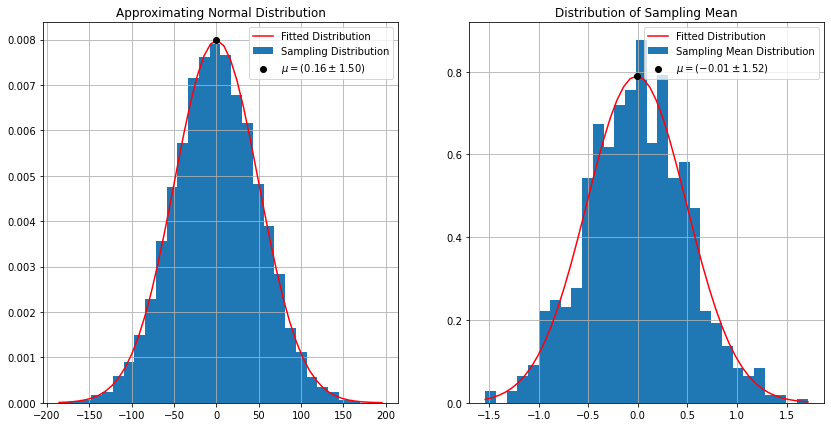

In [331]:
plot_distribution(np.random.normal,[0,50],guassian,
                  lambda mu,sigma:[mu,sigma],10000,1000,30,std=3)

## 2. Uniform Distribution $\mathcal{U}\left(a,b\right)$

1. Support: $\left[a,b\right]$
2. Parameters: Min $a$, Max $b$
3. PDF: $\frac{1}{b-a}$
4. Mean: $\frac{a+b}{2}$
5. Variance: $\frac{(b-a)^2}{12}$

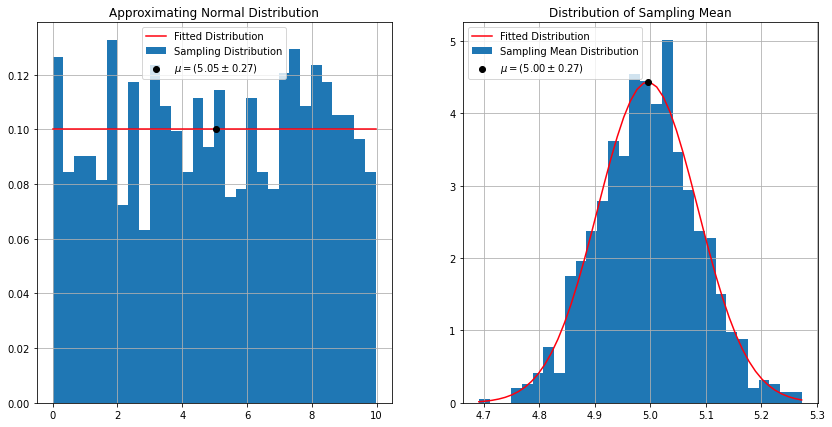

In [342]:
plot_distribution(np.random.uniform,[0,10],lambda x,a,b:np.ones(x.shape)/(b-a),
                  lambda mu,sigma:[mu-np.sqrt(3)*sigma,mu+np.sqrt(3)*sigma],n=1000,m=1000,k=30,std=3)

## 3. Exponential Distribution $\mathcal{E}\left(\lambda\right)$
Used to model processes with no memory, such as nulear decay
1. Support $\mathbb{R}_+$
2. Parameters: decay rate $\lambda$
3. PDF: $\lambda e^{-\lambda x}$
4. Mean: $\frac{1}{\lambda}$
5. Variance: $\frac{1}{\lambda^2}$

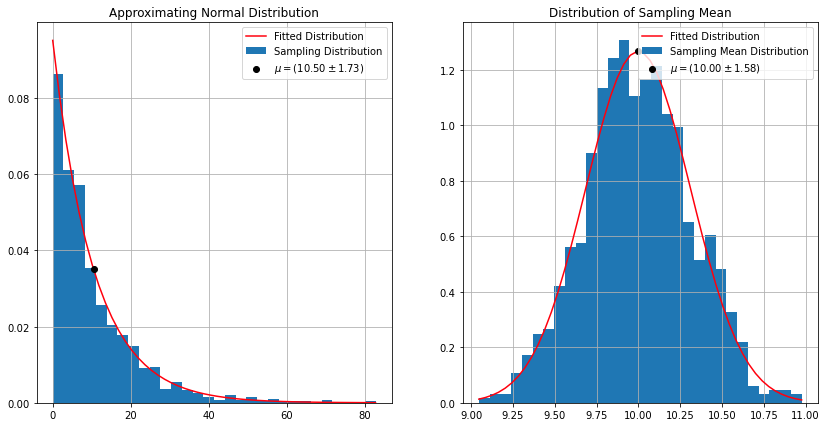

In [343]:
plot_distribution(np.random.exponential,[10],lambda x,s:s*np.heaviside(x,0)*np.exp(-s*x),
                  lambda mu,sigma:[1/mu],1000,1000,30,std=5)

## 4. Gamma Distribution $\mathcal{G}\left(k,\theta\right)$
Used to model a sum of processes with no memory
1. Support: $\mathbb{R}_+$
2. Parameters: Shape $k$, Scale $\theta$
3. PDF: $\frac{x^{k-1}}{\theta^k \Gamma(k)}e^{-\frac{x}{\theta}}$
4. Mean: $k\theta$
5. Variance: $k\theta^2$

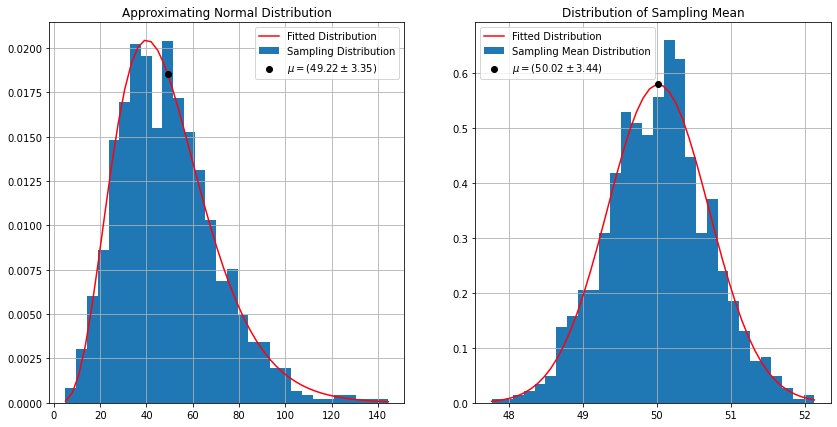

In [352]:
from scipy.special import gamma
plot_distribution(np.random.gamma,[5,10],
                  lambda x,k,theta:np.heaviside(x,0)*np.float_power(x,k-1)*np.exp(-x/theta)/(np.float_power(theta,k)*gamma(k)),
                  lambda mu,sigma:[(mu/sigma)**2,sigma**2/mu],1000,1000,30,std=5)

## 5. Logistic Distribution $\mathcal{L}\left(\mu,s\right)$
This distribution is used to model Logistic Regression
1. Support: $\mathbb{R}$
2. Parameters: mean $\mu$, scale $s>0$
3. PDF: $\frac{e^{-\frac{x-\mu}{s}}}{s\left(1+e^{-\frac{x-\mu}{s}}\right)^2}$
4. Mean: $\mu$
5. Variance $\frac{\pi^2}{3}s$


5.162418353690827 9.85985953178651


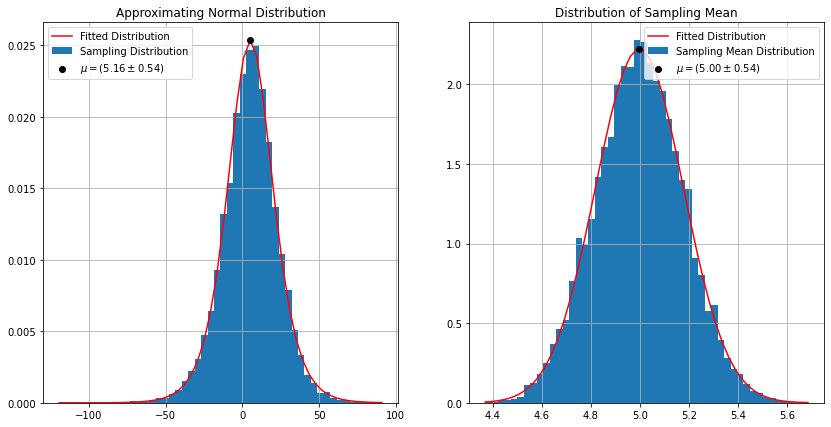

In [324]:
from scipy.special import gamma
plot_distribution(np.random.logistic,[5,10],
                  lambda x,mu,s:np.exp(-(x-mu)/s)/(s*(1+np.exp(-(x-mu)/s))**2),
                  lambda mu,sigma:[mu,sigma*np.sqrt(3)/np.pi],10000,10000,50,std=3)

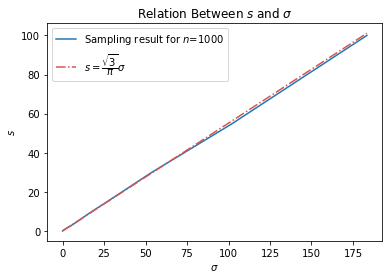

In [45]:
fig,ax = plt.subplots()
S = np.logspace(-3,2,20)
Sig=np.zeros(20)
n=1000
for i,s in enumerate(S):
    Sig[i]=np.random.logistic(0,s,n).std()
ax.plot(Sig,S,label="Sampling result for $n$={}".format(n))
ax.plot([0,Sig[-1]],[0,np.sqrt(3)*Sig[-1]/np.pi],color="xkcd:pale red",label=r"$s=\dfrac{\sqrt{3}}{\pi}\sigma$",ls="dashdot")
ax.set_title("Relation Between $s$ and $\sigma$")
ax.set_xlabel("$\sigma$")
ax.set_ylabel("$s$")
ax.legend()

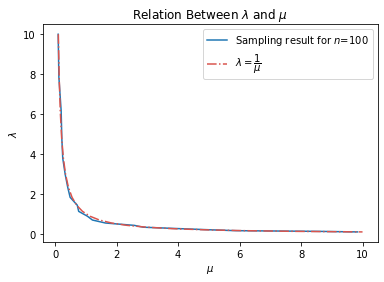

In [51]:
fig,ax = plt.subplots()
P=np.logspace(-1,1,20)
L = P
Expected=np.zeros(20)
n=100
for i,l in enumerate(L):
    Expected[i]=np.random.exponential(1/l,n).mean()
ax.plot(Expected,L,label="Sampling result for $n$={}".format(n))
ax.plot(P,1/P,color="xkcd:pale red",label=r"$\lambda=\dfrac{1}{\mu}$",ls="dashdot")
ax.set_title("Relation Between $\lambda$ and $\mu$")
ax.set_xlabel("$\mu$")
ax.set_ylabel("$\lambda$")
ax.legend()

In [195]:
((np.random.normal(0,50,[2000,1000]).var(axis=0)-50**2)**2).mean()

6340.0885306083355

In [207]:
def sampling_variance_variance(X):
    n=X.shape[0]
    k=((X-X.mean())**4).mean()
    sig=X.std()
    return (k-(sig**4)*(n-3)/(n-1))/n

def sampling_mean_variance(X):
    n=X.shape[0]
    sig=X.std()
    return sig**2/n
sampling_variance_variance(np.random.normal(0,50,2000))

1.2584541610598015

In [211]:
np.random.normal(0,50,2000).var()

2463.1626754905974

In [201]:
2*50**4/1999

6253.126563281641

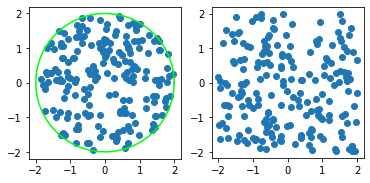

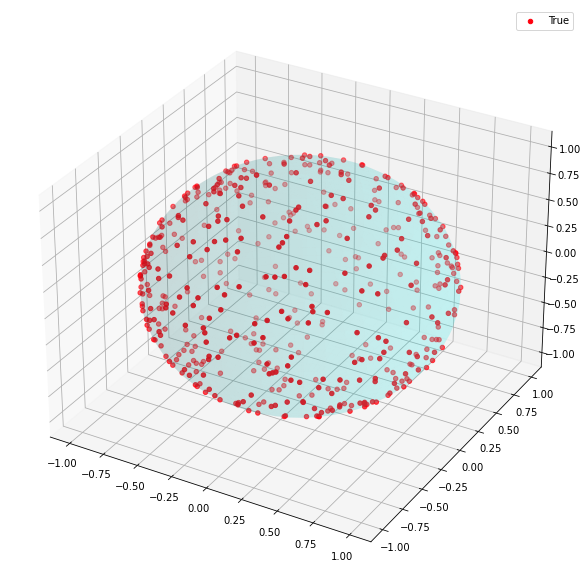

In [ ]:
S=np.array([np.cos(A1)*np.sin(A2),np.sin(A1)*np.sin(A2),np.cos(A2)])


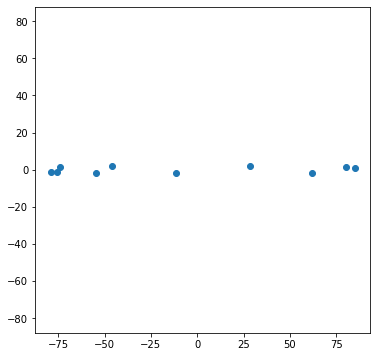

In [2]:
import scipy.integrate as integral
a=100
b=2
t=np.linspace(0,2*np.pi,10000)
L=integral.cumtrapz(x=t,y=np.sqrt((a*np.sin(t))**2+(b*np.cos(t))**2),initial=0)
n=10
s=np.random.uniform(0,L[-1],n)
w=np.zeros(n)
p=np.zeros(n)
for i in range(n):
    k=np.argmin(np.abs(L-s[i]))
    w[i]=t[k]
    p[i]=k
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(a*np.cos(w),b*np.sin(w))
ax.set_aspect("equal",adjustable="datalim")

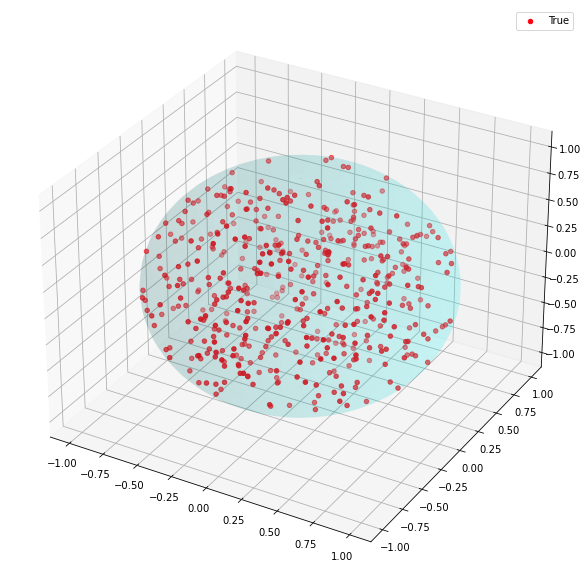

In [11]:
n=500
r=1
ax = fig.add_subplot(111,projection= "3d")
ax=plt.subplot(111,projection="3d")
plt.gcf().set_size_inches(18.5, 10.5)
A1=np.random.uniform(0,2*np.pi,n)
A2=2*np.arcsin(np.sqrt(np.random.uniform(0,1,n)))
R=np.float_power(np.random.uniform(0,r,n),1/3)
theta,phi=np.meshgrid(np.linspace(0,2*np.pi),np.linspace(0,np.pi))
ax.plot_surface(np.cos(theta)*np.sin(phi),np.sin(phi)*np.sin(theta),np.cos(phi),alpha=.1,color="xkcd:cyan")
ax.scatter(R*np.cos(A1)*np.sin(A2),R*np.sin(A1)*np.sin(A2),R*np.cos(A2),label="True",color="xkcd:bright red")
ax.legend()

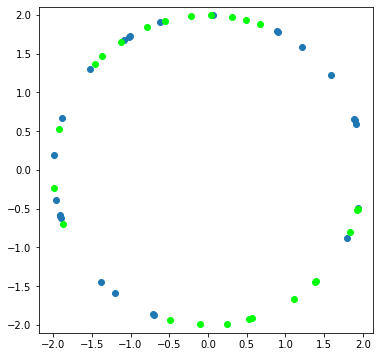

In [219]:
import scipy.integrate as integral
a=2
b=2
t=np.linspace(0,2*np.pi,10000)
L=integral.cumtrapz(x=t,y=np.sqrt((a*np.sin(t))**2+(b*np.cos(t))**2),initial=0)
n=25
s=np.random.uniform(0,L[-1],n)
w=np.zeros(n)
p=np.random.uniform(0,2*np.pi,n)
for i in range(n):
    k=np.argmin(np.abs(L-s[i]))
    w[i]=t[k]
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(a*np.cos(p),b*np.sin(p))
ax.scatter(a*np.cos(w),b*np.sin(w),color="xkcd:bright green",zorder=3)
ax.set_aspect("equal",adjustable="datalim")

In [217]:
L[-1]

12.566370614359172

In [211]:
p.std()

1.8700952620562306